In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cash_request=pd.read_csv('./project_dataset/extract - cash request - data analyst.csv')
fees=pd.read_csv('./project_dataset/extract - fees - data analyst - .csv')

In [3]:
# Copia del DataFrame original para evitar modificaciones no deseadas
cr = cash_request.copy()
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [4]:
# Convertir las fechas de interés a tipo datetime para facilitar su manipulación
cr['created_at'] = pd.to_datetime(cr['created_at'])
cr.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [5]:
# Crear una columna 'Mes' que represente el mes de la solicitud de adelanto en efectivo de cada cliente
cr['Mes'] = cr['created_at'].dt.to_period('M')
cr.head()

/tmp/ipykernel_5428/4058608649.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cr['Mes'] = cr['created_at'].dt.to_period('M')


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,Mes
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-05


In [6]:
# Crear una columna 'Cohorte' que represente el mes de la primera solicitud de adelanto en efectivo de cada cliente
cr['Cohorte'] = cr.groupby('user_id')['created_at'].transform('min').dt.to_period('M')
cr.head(10)

/tmp/ipykernel_5428/3862736996.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cr['Cohorte'] = cr.groupby('user_id')['created_at'].transform('min').dt.to_period('M')


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,Mes,Cohorte
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-05,2020-05
5,2145,100.0,money_back,2020-05-23 20:58:55.129432+00:00,2020-07-06 03:36:03.023911+00,9489.0,2020-05-24 12:40:33.05491+00,NaN,2020-06-06 22:00:00+00,2020-05-26,2020-07-06 03:36:03.023521+00,regular,NaN,completed,2020-06-12 22:27:04.837525+00,2020-07-06 03:36:03.030904+00,2020-05,2020-05
6,3512,100.0,rejected,2020-06-16 17:07:38.452652+00:00,2020-06-17 10:21:21.364746+00,14631.0,2020-06-17 10:21:21.360742+00,NaN,2020-07-11 23:51:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-06,2020-06
7,654,100.0,rejected,2020-02-10 01:11:53.808270+00:00,2020-02-10 11:53:32.104131+00,NaN,2020-02-10 09:11:21.350695+00,309.0,2020-03-11 01:11:53.80793+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-02,NaT
8,5672,100.0,canceled,2020-06-28 12:06:33.712840+00:00,2020-06-28 12:06:33.712853+00,NaN,NaN,2499.0,2020-07-07 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-06,NaT
9,71,90.0,rejected,2019-12-10 19:51:23.911206+00:00,2019-12-12 15:06:11.192888+00,897.0,2019-12-12 15:06:11.190299+00,NaN,2019-12-17 19:51:23.910748+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12,2019-12


In [7]:
# Calcular el total de monto del adelanto en efectivo por mes para cada cohorte
cohort_data = cr.groupby('Cohorte')['amount'].sum().reset_index()
cohort_data

,Cohorte,amount
0,2019-11,232.0
1,2019-12,84781.0
2,2020-01,31104.0
3,2020-02,39777.0
4,2020-03,31555.0
5,2020-04,79244.0
6,2020-05,134658.0
7,2020-06,425531.0
8,2020-07,320877.0
9,2020-08,116750.0


In [8]:
# Calcular la cantidad de clientes únicos en cada cohorte
cohort_sizes = cr.groupby('Cohorte').agg(Num_Clientes=('user_id', 'nunique')).reset_index()
cohort_sizes

,Cohorte,Num_Clientes
0,2019-11,1
1,2019-12,204
2,2020-01,90
3,2020-02,84
4,2020-03,69
5,2020-04,212
6,2020-05,369
7,2020-06,1338
8,2020-07,1294
9,2020-08,656


In [9]:
# Calcular la cantidad de solicutes de adelanto de efectivo de los clientes de cada cohorte en cada mes
cohort_sizes_monthly = cr.groupby(['Cohorte', 'Mes']).agg(Num_Clientes=('user_id', 'nunique')).reset_index()
cohort_sizes_monthly

,Cohorte,Mes,Num_Clientes
0,2019-11,2019-11,1
1,2019-11,2019-12,1
2,2019-11,2020-04,1
3,2019-11,2020-05,1
4,2019-11,2020-08,1
...,...,...,...
78,2020-09,2020-10,660
79,2020-09,2020-11,20
80,2020-10,2020-10,4694
81,2020-10,2020-11,15


In [10]:
# Calcular la cantidad de clientes en la primera solicitud de adelanto en efectivo de cada cohorte
cohort_sizes_initial = cohort_sizes_monthly.groupby('Cohorte').first()
cohort_sizes_initial

,Mes,Num_Clientes
Cohorte,,
2019-11,2019-11,1
2019-12,2019-12,204
2020-01,2020-01,90
2020-02,2020-02,84
2020-03,2020-03,69
2020-04,2020-04,212
2020-05,2020-05,369
2020-06,2020-06,1338
2020-07,2020-07,1294


In [11]:
# Calcular la tasa de retención
retention = cohort_sizes_monthly.pivot(index='Cohorte', columns='Mes', values='Num_Clientes').div(cohort_sizes_initial['Num_Clientes'], axis=0)
retention

Mes,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
Cohorte,,,,,,,,,,,,,
2019-11,1.0,1.0,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN
2019-12,NaN,1.0,0.338235,0.215686,0.274510,0.259804,0.323529,0.289216,0.254902,0.308824,0.205882,0.289216,0.004902
2020-01,NaN,NaN,1.000000,0.211111,0.155556,0.300000,0.255556,0.266667,0.300000,0.233333,0.222222,0.255556,0.011111
2020-02,NaN,NaN,NaN,1.000000,0.523810,0.488095,0.488095,0.452381,0.428571,0.428571,0.297619,0.416667,NaN
2020-03,NaN,NaN,NaN,NaN,1.000000,0.507246,0.463768,0.594203,0.434783,0.405797,0.376812,0.391304,0.014493
2020-04,NaN,NaN,NaN,NaN,NaN,1.000000,0.490566,0.509434,0.396226,0.358491,0.311321,0.278302,NaN
2020-05,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.615176,0.536585,0.452575,0.346883,0.401084,0.008130
2020-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.520927,0.515695,0.403587,0.405082,0.002990
2020-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.499227,0.374034,0.394900,0.005410


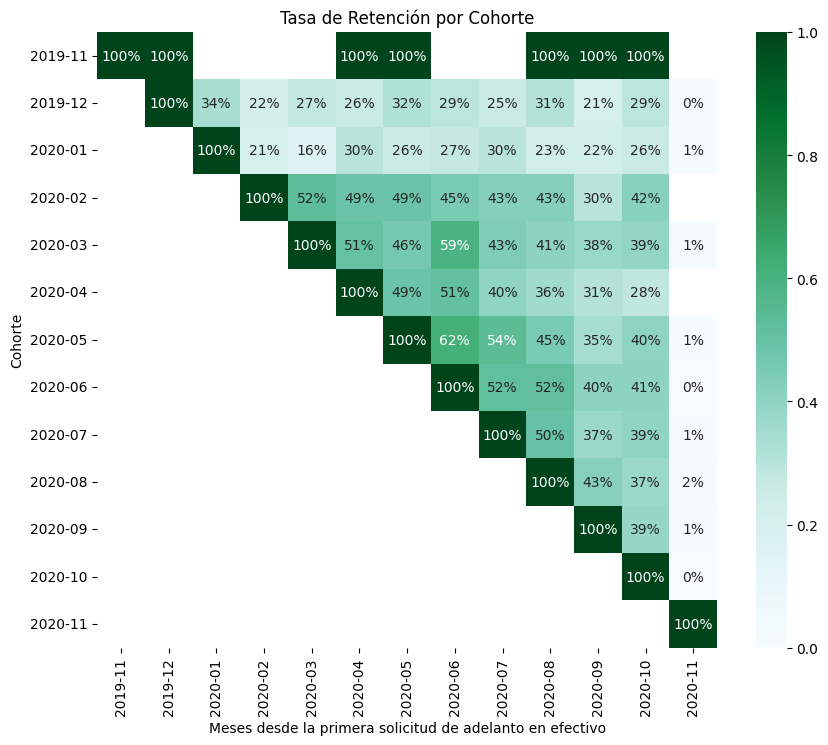

In [12]:
# Graficar la tasa de retención
plt.figure(figsize=(10, 8))
plt.title('Tasa de Retención por Cohorte')
sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=1.0, cmap='BuGn')
plt.xlabel('Meses desde la primera solicitud de adelanto en efectivo')
plt.ylabel('Cohorte')
plt.show()